# MOVIE RECOMMENDER SYSTEM 

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import FreqDist,word_tokenize
from wordcloud import STOPWORDS

In [2]:
movies = pd.read_csv("movies.csv",encoding='latin-1')
tags = pd.read_csv("tags.csv",encoding = 'latin-1')
ratings = pd.read_csv("ratings.csv",encoding='latin-1')

In [3]:
movies.head(20) 

,MovieID,Title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
tags.head(20)

,userId,MovieID,tag
0,15,4973,excellent!
1,20,1747,politics
2,20,1747,satire
3,20,2424,chick flick 212
4,20,2424,hanks
5,20,2424,ryan
6,20,2947,action
7,20,2947,bond
8,20,3033,spoof
9,20,3033,star wars


In [5]:
ratings.head(20)

,userId,MovieID,Rating
0,1,122,5.0
1,1,185,5.0
2,1,231,5.0
3,1,292,5.0
4,1,316,5.0
5,1,329,5.0
6,1,355,5.0
7,1,356,5.0
8,1,362,5.0
9,1,364,5.0


# CONTENT BASED RECOMMENDATION - SIMILARITY IN GENRES AND TAGS ABOUT MOVIE

In [6]:
# Defining a function to tokenize and encode the character strings passed into a vector using tf-idf vectorizer.

def tf_idf(char1,char2):
    corpus = [str(char1),str(char2)]
    from sklearn.feature_extraction.text import TfidfVectorizer
    #print(corpus)
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names()
    dense = vectors.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns=feature_names)      
    return (df.loc[0,:],df.loc[1,:])
    

In [7]:
# Defining a function which takes arguments as- movie title-char, the column index-j and a dataframe-data.
# The function calculates cosine similarity between the strings in the jth column of the dataset data
# corresponding to the movie title char and the other movie titles. It then returns the 10 movie titles having highest cosine 
# similarity with that of the passed movie title.

from sklearn.metrics.pairwise import cosine_similarity
#cs = cosine_similarity
def movie(char,indices,data):
    char_sim={}
    for char1 in data['Title']:
        unique_index = pd.Index(data['Title'])
        i = unique_index.get_loc(char)
        j = unique_index.get_loc(char1)
        char_sim[char1] = cosine_similarity(tf_idf(data.iloc[i,indices],data.iloc[j,indices]))[0,1]
    sort_char = sorted(char_sim.items(), key = lambda x:(x[1],x[0]),reverse=True)
    ans = [i[0] for i in sort_char[0:11]]
    if char in ans:
        ans.remove(char)
    return ans
    

In [8]:
# Getting recommendations for the movie Toy Story.

print(movie("Toy Story (1995)",2,movies))

['Wild, The (2006)', 'Toy Story 2 (1999)', 'Shrek the Third (2007)', "Kiki's Delivery Service (Majo no takkyÃ»bin) (1989)", "Emperor's New Groove, The (2000)", 'Antz (1998)', 'Ant Bully, The (2006)', 'Adventures of Rocky and Bullwinkle, The (2000)', 'Valiant (2005)', 'TMNT (Teenage Mutant Ninja Turtles) (2007)']


In [9]:
# Filling the null values in tags dataset with empty strings.
# Defining a new dataframe with joining all the tags for a particular movieId.

tags.fillna("",inplace=True)
keywords=pd.DataFrame(tags.groupby('MovieID')['tag'].apply(','.join))

In [10]:
# Merging the datasets keywords and movies on movieId.

df = pd.merge(movies,keywords,on="MovieID")

In [11]:
df["tag_genre"] = df["genre"] + df["tag"]

In [12]:
stopwords=set(STOPWORDS)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df["tag_genre"] = df['tag_genre'].fillna("")

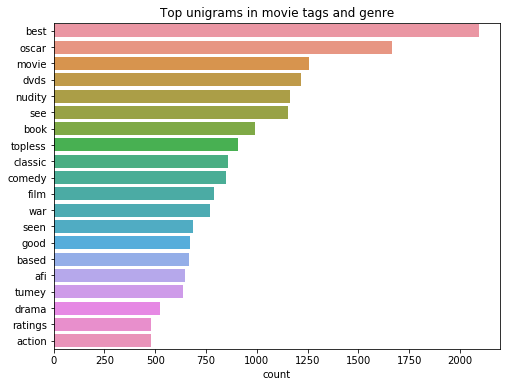

In [18]:
# Plotting the Top unigrams in movie tags and genres.

word_freq = FreqDist(w for w in word_tokenize(' '.join(df['tag_genre']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(top20w['count'], top20w.index)
plt.title('Top unigrams in movie tags and genre')
plt.show()

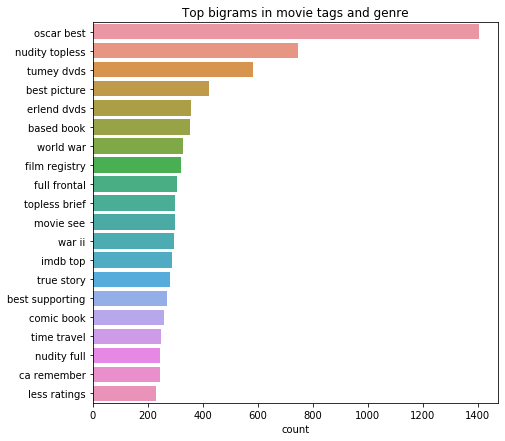

In [19]:
# Plotting the Top bigrams in movie tags and genres.

from nltk import bigrams

plt.figure(figsize=(16,7))
plt.subplot(121)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(df['tag_genre']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
sns.barplot(bgdf_d.head(20)['count'], bgdf_d.index[:20])
plt.title('Top bigrams in movie tags and genre')
plt.show()

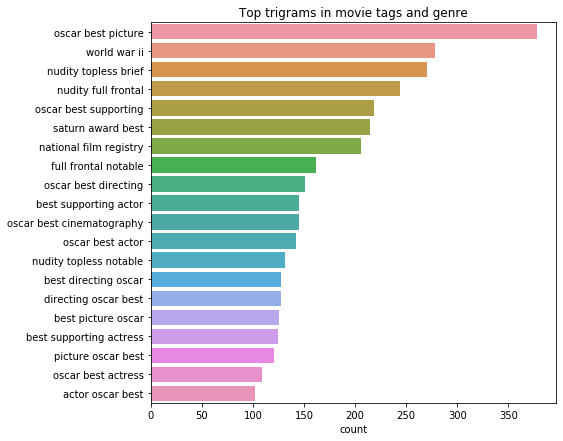

In [20]:
# Plotting the Top trigrams in movie tags and genres.

from nltk import trigrams

plt.figure(figsize=(16,7))
plt.subplot(121)
trigram_d = list(trigrams([w for w in word_tokenize(' '.join(df['tag_genre']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
d_fq = FreqDist(tg for tg in trigram_d)
tgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
tgdf_d.index = tgdf_d.index.map(lambda x: ' '.join(x))
tgdf_d = tgdf_d.sort_values('count',ascending=False)
sns.barplot(tgdf_d.head(20)['count'], tgdf_d.index[:20])
plt.title('Top trigrams in movie tags and genre')
plt.show()

In [21]:
# Printing the top 10 recommendations for the movie Toy Story.

print(movie("Toy Story (1995)",4,df))

['Toy Story 2 (1999)', "Bug's Life, A (1998)", 'Finding Nemo (2003)', 'Monsters, Inc. (2001)', 'Ratatouille (2007)', 'Incredibles, The (2004)', 'Antz (1998)', 'Cars (2006)', 'WALLÂ·E (2008)', 'Lady and the Tramp (1955)']


# COLLABORATIVE FILTERING FOR RECOMMENDATIONS USING K NEAREST NEIGHBORS

In [22]:
df = pd.merge(ratings,movies,on="MovieID")

In [23]:
df.head()

,userId,MovieID,Rating,Title,genre
0,1,122,5.0,Boomerang (1992),Comedy|Romance
1,139,122,3.0,Boomerang (1992),Comedy|Romance
2,149,122,2.5,Boomerang (1992),Comedy|Romance
3,182,122,3.0,Boomerang (1992),Comedy|Romance
4,215,122,4.5,Boomerang (1992),Comedy|Romance


In [24]:
# Define a new dataframe combine_movie_rating which is the dataframe df after removing null values in the title column.
# Defining new dataframe movie_ratingCount which has columns - movie title and total number of ratings given.

combine_movie_rating = df.dropna(axis = 0, subset = ['Title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['Title'])['Rating'].
     count().
     reset_index().
     rename(columns = {'Rating': 'totalRatingCount'})
     [['Title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,Title,totalRatingCount
0,'Round Midnight (1986),7
1,'Til There Was You (1997),43
2,"'burbs, The (1989)",153
3,'night Mother (1986),26
4,*batteries not included (1987),73


In [25]:
# Merging combine_movie_rating and movie_ratingCount into a new dataframe rating_with_totalRatingCount.

rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'Title', right_on = 'Title', how = 'left')
rating_with_totalRatingCount.head()

,userId,MovieID,Rating,Title,genre,totalRatingCount
0,1,122,5.0,Boomerang (1992),Comedy|Romance,238
1,139,122,3.0,Boomerang (1992),Comedy|Romance,238
2,149,122,2.5,Boomerang (1992),Comedy|Romance,238
3,182,122,3.0,Boomerang (1992),Comedy|Romance,238
4,215,122,4.5,Boomerang (1992),Comedy|Romance,238


In [26]:
# Defining the popularity threshold as 50. So we will consider only those movies which have total ratings more than 50. 
# Other movies with less than 50 ratings will not be considered since it wont be very popular.
# We define a new dataframe rating_popular_movie which has all movies with total ratings more than 50.

popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,MovieID,Rating,Title,genre,totalRatingCount
0,1,122,5.0,Boomerang (1992),Comedy|Romance,238
1,139,122,3.0,Boomerang (1992),Comedy|Romance,238
2,149,122,2.5,Boomerang (1992),Comedy|Romance,238
3,182,122,3.0,Boomerang (1992),Comedy|Romance,238
4,215,122,4.5,Boomerang (1992),Comedy|Romance,238


In [27]:
rating_popular_movie.shape

(966714, 6)

In [28]:
rating_popular_movie['Title'].unique().shape

(3010,)

In [29]:
# Creating a pivot table- each row is a movie title, each column a user, and each cell represents the rating given by that 
# corresponding user for that corresponding movie.

movie_features_df=rating_popular_movie.pivot_table(index='Title',columns='userId',values='Rating').fillna(0)
movie_features_df

userId,1,2,3,4,5,6,7,8,9,10,...,7839,7840,7841,7842,7843,7844,7845,7846,7847,7848
Title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
*batteries not included (1987),0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,...,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zero Effect (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zodiac (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# storing the movie_titles from the pivot table in a variable test which can help us getting the movie index for getting 
# the recommendations.

test = movie_features_df.index
test

Index([''burbs, The (1989)', '*batteries not included (1987)',
       '...And Justice for All (1979)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '12 Monkeys (Twelve Monkeys) (1995)', '13 Going on 30 (2004)',
       '13th Warrior, The (1999)', '1408 (2007)',
       ...
       'Young Poisoner's Handbook, The (1995)', 'Young Sherlock Holmes (1985)',
       'Your Friends and Neighbors (1998)', 'Zatoichi (ZatÃ´ichi) (2003)',
       'Zelig (1983)', 'Zero Effect (1998)', 'Zodiac (2007)',
       'Zoolander (2001)', 'Zulu (1964)', 'eXistenZ (1999)'],
      dtype='object', name='Title', length=3010)

In [31]:
# We convert the pivot table to a matrix and then fit NearestNeighbors algorithm on the matrix using cosine similarity as
# as the metric.

from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [32]:
# We are getting the index value for the movie title whose recommendation we want to find, in this case Toy Story(1995).

unique_index = pd.Index(test)
j = unique_index.get_loc("Toy Story (1995)")
print(j)

2776


In [34]:
# We then use the nearest neighbours model to find the 10 neighbors for the movie title. These 10 neighbors are the recommendations.

distances, indices = model_knn.kneighbors(movie_features_df.iloc[j,:].values.reshape(1, -1), n_neighbors = 11)
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[j]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Toy Story (1995):

1: Star Wars, with distance of 0.41432328561609133:
2: Independence Day (a.k.a. ID4) (1996), with distance of 0.43339374878237114:
3: Mission, with distance of 0.44277701203768494:
4: 12 Monkeys (Twelve Monkeys) (1995), with distance of 0.4664206638247447:
5: Willy Wonka & the Chocolate Factory (1971), with distance of 0.46819308804698523:
6: Twister (1996), with distance of 0.4795560307410165:
7: Aladdin (1992), with distance of 0.48288767965436763:
8: Rock, The (1996), with distance of 0.48534661715524563:
9: Forrest Gump (1994), with distance of 0.4917620321715478:
10: Back to the Future (1985), with distance of 0.49220534493786505:
